In [1]:
# ------------    Load Dataset & Libraries    ------------
# Import the following packages needed to perform the analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To remove 'warnings' use 'filterwarnings'
import warnings
warnings.filterwarnings('ignore')

# plot shown in Jupyter Notebook
%matplotlib inline  
# expand the figure-width
plt.rcParams['figure.figsize'] = 8, 4


# Loading Dataset
# Import the csv dataset
movies = pd.read_csv("./MovieRatings.csv")     # load datset

# -=-=-  Explore the data  -=-=-
# Visualize the dataframe
movies

# rename the column names to single-string names
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']
movies.head()    # view dataset


# ----   convert 'numerical-type',' object-type' to "categorical-type"   ----
movies.Film = movies.Film.astype("category") # use assignment '=' to update the dataset
movies.Genre = movies.Genre.astype("category")   
movies.Year = movies.Year.astype("category")   
movies.info()   # check the data-type changes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


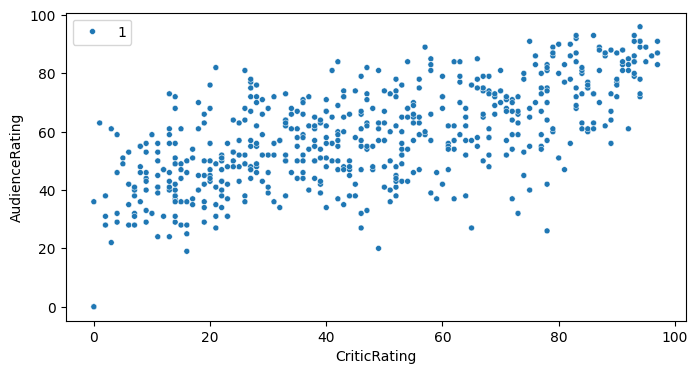

In [6]:
# ------------    KDE PLOT: Kernel Density Estimate plot    ------------

# How can we visualize 'audiance rating' vs 'critic rating'?
    # We can use 'scatter-plot'
    # We also can use 'lmplot'
vis1_sctr = sns.scatterplot(data=movies, x='CriticRating', y='AudienceRating', size=1)

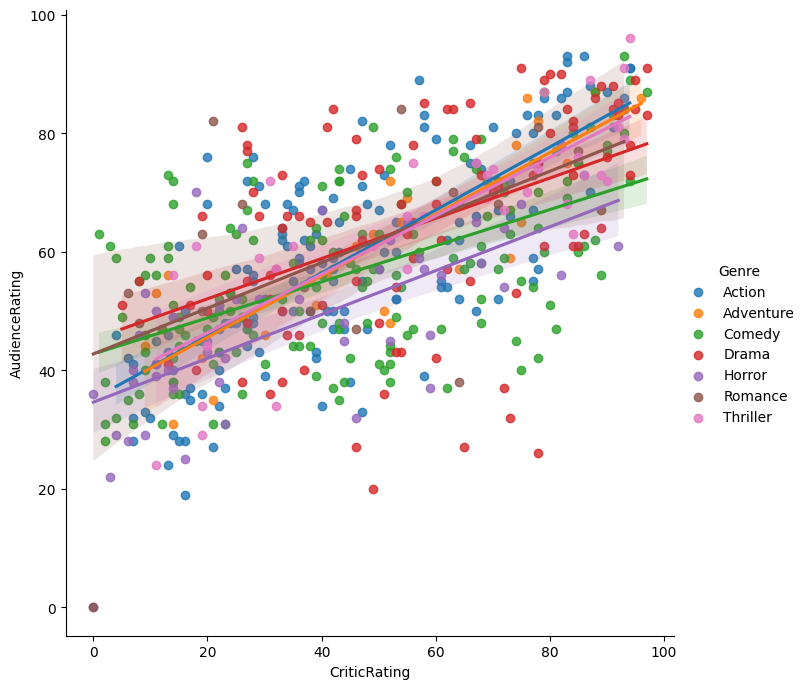

In [8]:
# lmplot
vis2_lm = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', fit_reg=True, hue='Genre', height=7, aspect=1)    

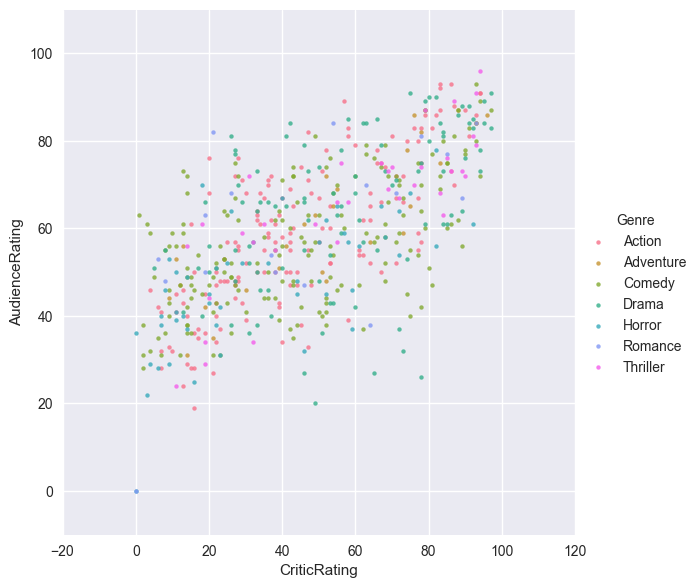

In [5]:
plt.style.use("seaborn")    # background color
vis2_lm = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', fit_reg=False, hue='Genre', height=6, aspect=1, scatter_kws={'s': 10})
# vis2_lm.set(xlim=(-20, None))
vis2_lm.set(xlim=(-20, 120), ylim=(-10, 110))


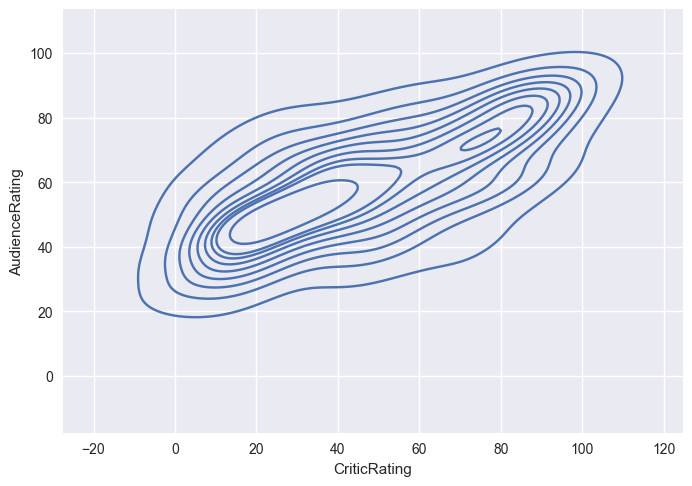

In [6]:
# KDE: Kernel Density Estimate
kDe1 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating)

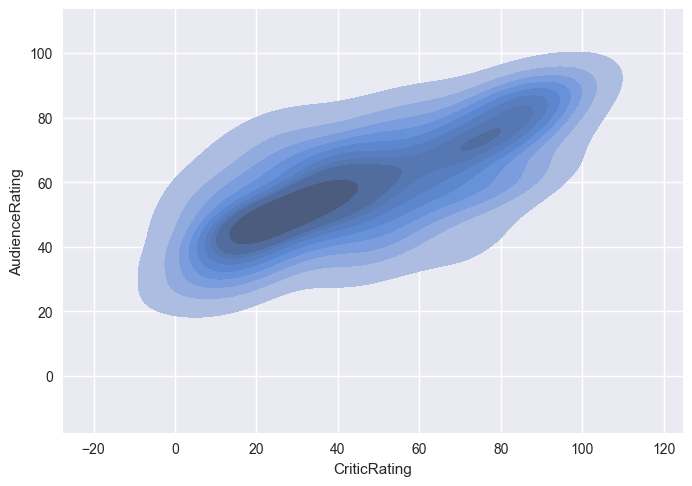

In [7]:
kDe2 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, shade=True, shade_lowest=False)

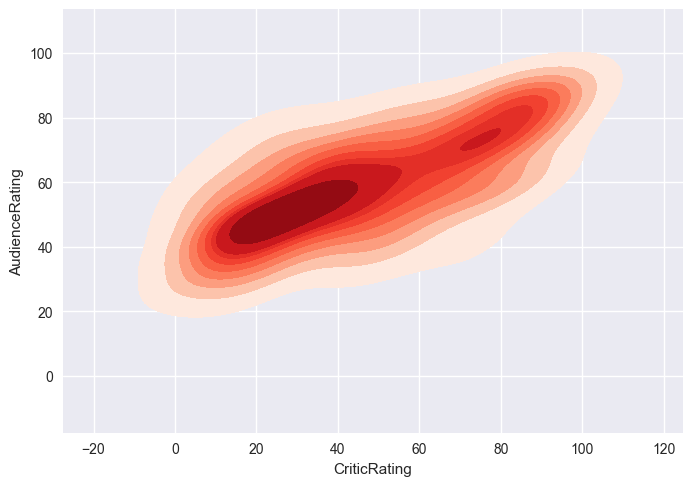

In [8]:
kDe3 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds')

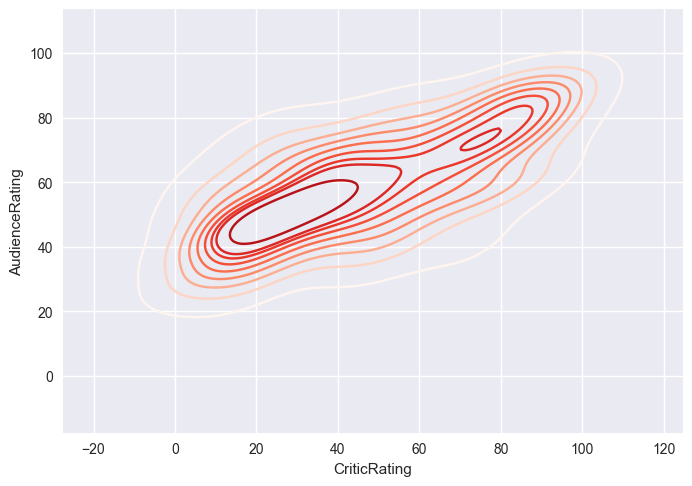

In [9]:
kDe4 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, cmap='Reds')

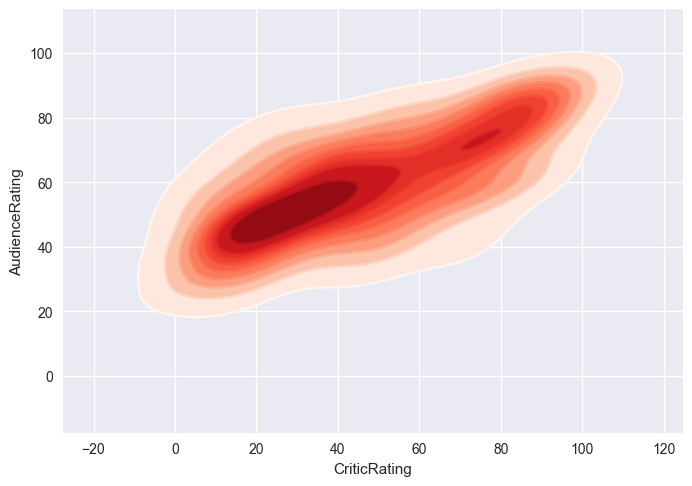

In [10]:
# more professinal plot: combine with border
kDe5 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds')
kDe6 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, cmap='Reds') # ads border on top of 'kDe5'

[(-40.0, 250.0), (-20.0, 120.0)]

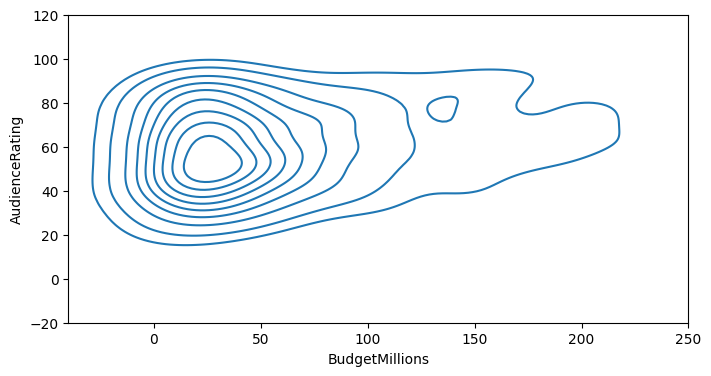

In [3]:
# ------------    Subplots()    ------------
# allows us to create some sophisticated visualizations
    # it COMBINES different visualizations togather

# Create new Kernel Density Estimate (KDE)
k_BA = sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating')
k_BA.set(xlim=(-40, 250), ylim=(-20, 120))

[(-40.0, 250.0), (-20.0, 120.0)]

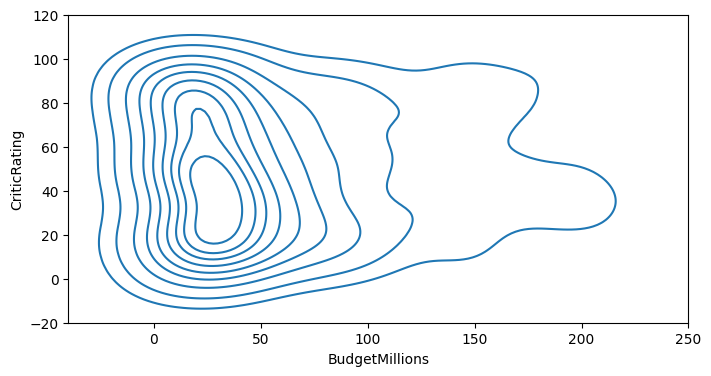

In [4]:
# (KDE): BudgetMillions vs AudienceRating
k_BC = sns.kdeplot(data=movies, x='BudgetMillions', y='CriticRating')
k_BC.set(xlim=(-40, 250), ylim=(-20, 120))

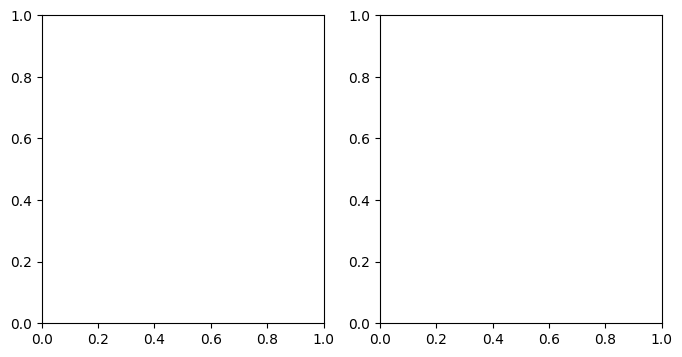

In [3]:
# subplots:
    # Notice we have to set 'xlim' & 'ylim' same in the both plots 'k_BA' and 'k_BC' for camparison
    # subplot is a tool used to do that kind of comparison
    # subplot comes from 'pyplot'
    # in subplot we can show multiple plots at the same-time
    # a subplot can be a 1D or 2D array of plots
    # we can put the different plots in different location using coordinates (array-index)

# writing as below is a coding convention
f, ax = plt.subplots(1, 2)
# above creates an 1D array of 2-plots

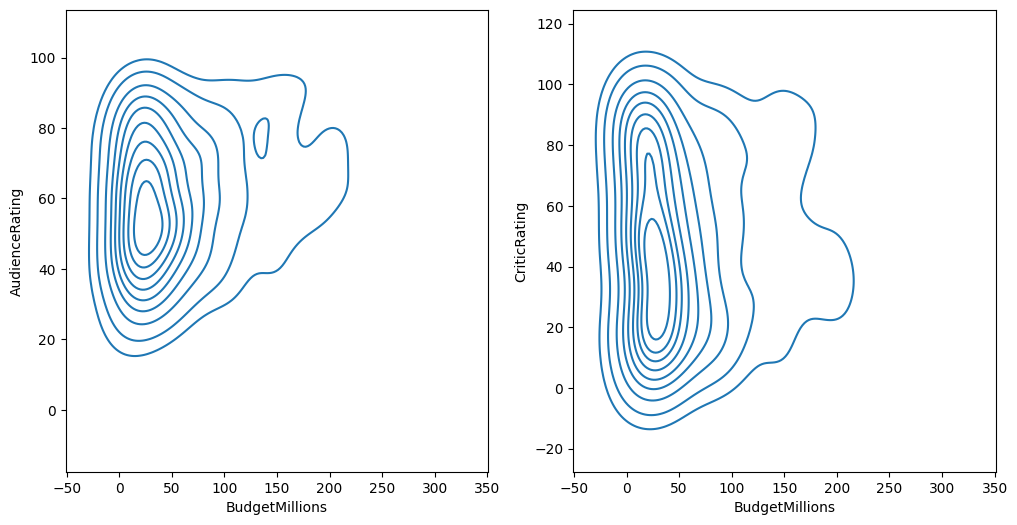

In [6]:
# we'll place 'k_BA' and 'k_BC' in the following subplot

# We also have to specify the place of each plot, notice the arrgumnet ax=axes[0], ax=axes[1]
    # index is used: axes[0] is the first plot, axes[1] is the second plot
f, axes = plt.subplots(1, 2, figsize = (12, 6))
k_BA = sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating', ax=axes[0])
k_BC = sns.kdeplot(data=movies, x='BudgetMillions', y='CriticRating', ax=axes[1])

In [7]:
axes

array([<AxesSubplot:xlabel='BudgetMillions', ylabel='AudienceRating'>,
       <AxesSubplot:xlabel='BudgetMillions', ylabel='CriticRating'>],
      dtype=object)

[(-40.0, 250.0), (-20.0, 120.0)]

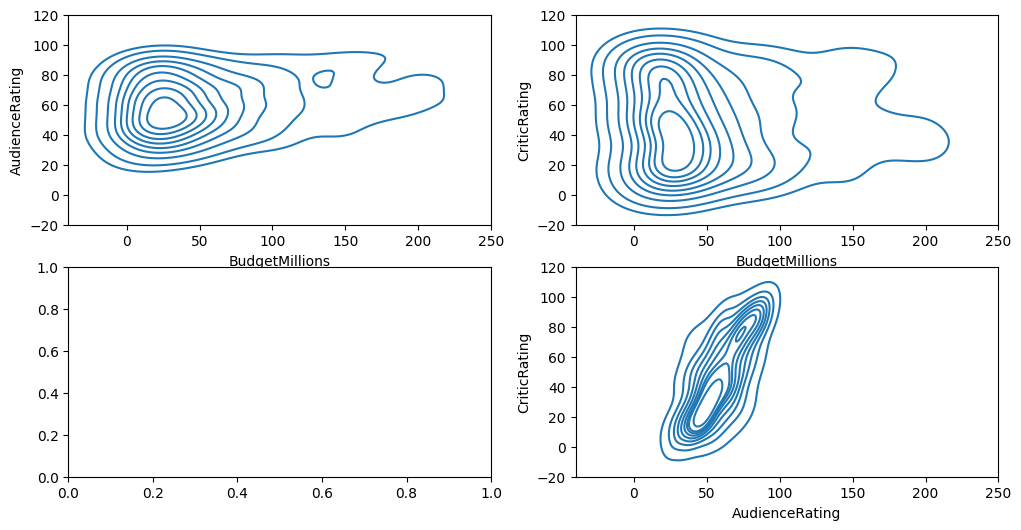

In [12]:
f, axes = plt.subplots(2, 2, figsize = (12, 6))
# k_BA = sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating', ax=axes[0])   # ERROR
# k_BC = sns.kdeplot(data=movies, x='BudgetMillions', y='CriticRating', ax=axes[1])     # ERROR

# notice we have to specify 2-index for each plot,, otherwise we'll get an error
k_BA = sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating', ax=axes[0, 0])
k_BA.set(xlim=(-40, 250), ylim=(-20, 120))
k_BC = sns.kdeplot(data=movies, x='BudgetMillions', y='CriticRating', ax=axes[0,1])
k_BC.set(xlim=(-40, 250), ylim=(-20, 120))
k_AC = sns.kdeplot(data=movies, x='AudienceRating', y='CriticRating', ax=axes[1,1])
k_AC.set(xlim=(-40, 250), ylim=(-20, 120))

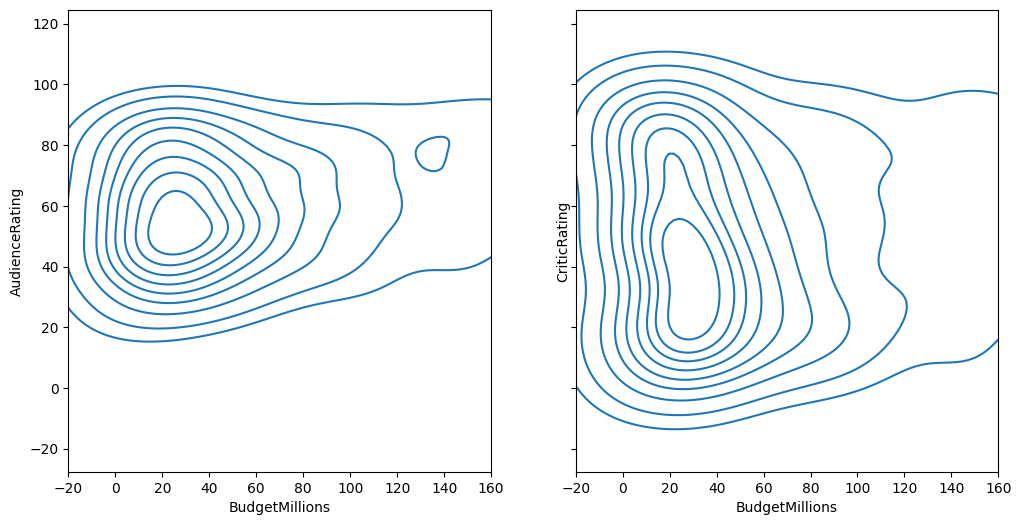

In [20]:
# setting the RANGE of x, y:
    # as before we use 'xlim' and 'ylim'
    # however, we can use 'sharex', 'sharey' attributes to set all same 'xlim & ylim'
f2, axes2 = plt.subplots(1, 2, figsize = (12, 6), sharex=True, sharey=True)
k_BA = sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating', ax=axes2[0])
k_BC = sns.kdeplot(data=movies, x='BudgetMillions', y='CriticRating', ax=axes2[1])
k_BA.set(xlim=(-20, 160))
# issue: sharex, sharey hides 'label'
    # the label exists, but it is not visible.
    # Add this line to get the label to be visible.
axes2[1].yaxis.get_label().set_visible(True)
# We can use same for k_BC
    # k_BC.set(xlim=(-20, 160))
    # but it can be done with 'subplots' attribute "sharex"
    # 'sharex=True' set the same xlim for all plots
    # 'sharey' does the same thing for y-axis

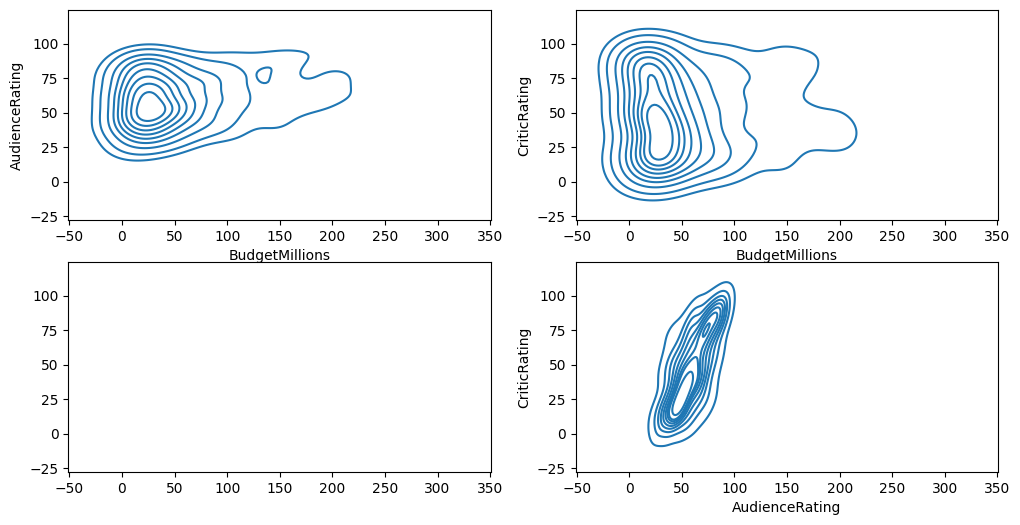

In [33]:
fig_3, axes_3 = plt.subplots(2, 2, figsize = (12, 6), sharex=True, sharey=True)
k_BA = sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating', ax=axes_3[0, 0])
k_BC = sns.kdeplot(data=movies, x='BudgetMillions', y='CriticRating', ax=axes_3[0,1])
k_AC = sns.kdeplot(data=movies, x='AudienceRating', y='CriticRating', ax=axes_3[1,1])
for i in range(0,2):
    for j in range(0,2):
        axes_3[i,j].yaxis.get_label().set_visible(True)
        axes_3[i,j].xaxis.get_label().set_visible(True)
        # xaxis.set_tick_params(which='both', labelbottom=True)
        axes_3[i,j].xaxis.set_tick_params(which='both', labelbottom=True)
        axes_3[i,j].yaxis.set_tick_params(which='both', labelleft=True)


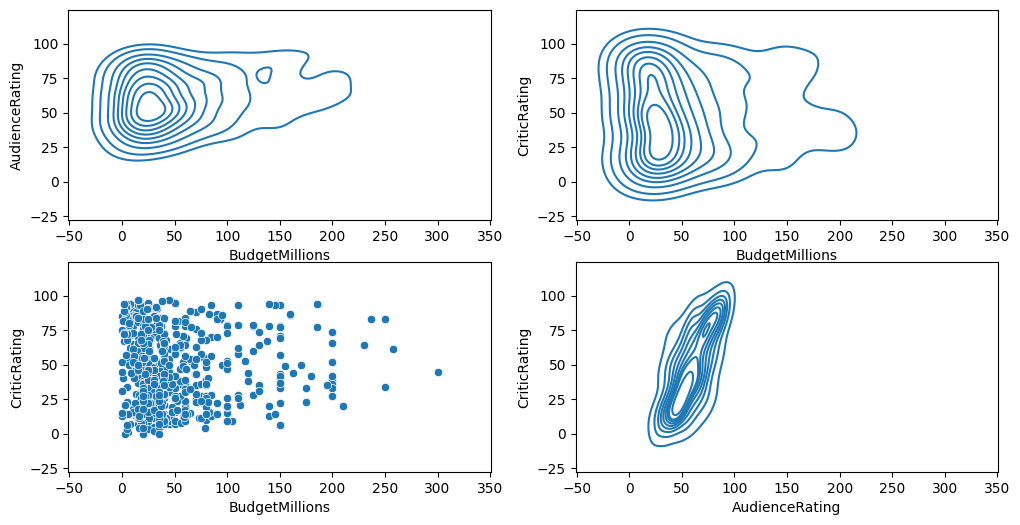

In [36]:
f_mix, axes_mix = plt.subplots(2, 2, figsize = (12, 6), sharex=True, sharey=True)
k_BA = sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating', ax=axes_mix[0, 0])
k_BC = sns.kdeplot(data=movies, x='BudgetMillions', y='CriticRating', ax=axes_mix[0,1])
k_BC = sns.scatterplot(data=movies, x='BudgetMillions', y='CriticRating', ax=axes_mix[1,0])
k_AC = sns.kdeplot(data=movies, x='AudienceRating', y='CriticRating', ax=axes_mix[1,1])
for i in range(0,2):
    for j in range(0,2):
        # show labels
        axes_mix[i,j].yaxis.get_label().set_visible(True)
        axes_mix[i,j].xaxis.get_label().set_visible(True)
        # show ticks
        axes_mix[i,j].xaxis.set_tick_params(which='both', labelbottom=True)
        axes_mix[i,j].yaxis.set_tick_params(which='both', labelleft=True)